In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [2]:
# Read the CSV file
df = pd.read_csv('scaled_test_data_concatenated_v2.csv')

# Convert the 'Position 1' column to dummy variables
df = pd.get_dummies(df, columns=['Position 1'], drop_first=False)

# Display the first few rows of the modified dataframe
df.head()

,Player,Team,Age,Market value,Birth country,Height,Weight,Goals,xG,Assists,...,Position 1_CF,Position 1_CM,Position 1_DMF,Position 1_GK,Position 1_LB,Position 1_LW,Position 1_LWB,Position 1_RB,Position 1_RW,Position 1_RWB
0,Hugo Bueno,Wolverhampton Wanderers,-1.650487,200000,Spain,-0.386910,-0.419228,-0.713102,-0.786288,-0.248585,...,False,False,False,False,True,False,False,False,False,False
1,Jonny Otto,Wolverhampton Wanderers,0.537946,17000000,Spain,-1.131609,-0.840882,-0.421577,-0.744785,-0.772397,...,False,False,False,False,False,False,False,True,False,False
2,C. Dawson,Wolverhampton Wanderers,1.510582,2500000,England,0.804608,0.283530,-0.421577,-0.163734,-0.772397,...,False,False,False,False,False,False,False,False,False,False
3,Matheus Nunes,Wolverhampton Wanderers,-0.677850,45000000,Brazil,0.208849,0.283530,-0.421577,0.078903,-0.248585,...,False,False,False,False,False,False,False,False,False,False
4,R. Aït Nouri,Wolverhampton Wanderers,-1.407328,22000000,France,-0.386910,-0.840882,-0.421577,-0.435104,-0.772397,...,False,False,False,False,True,False,False,False,False,False


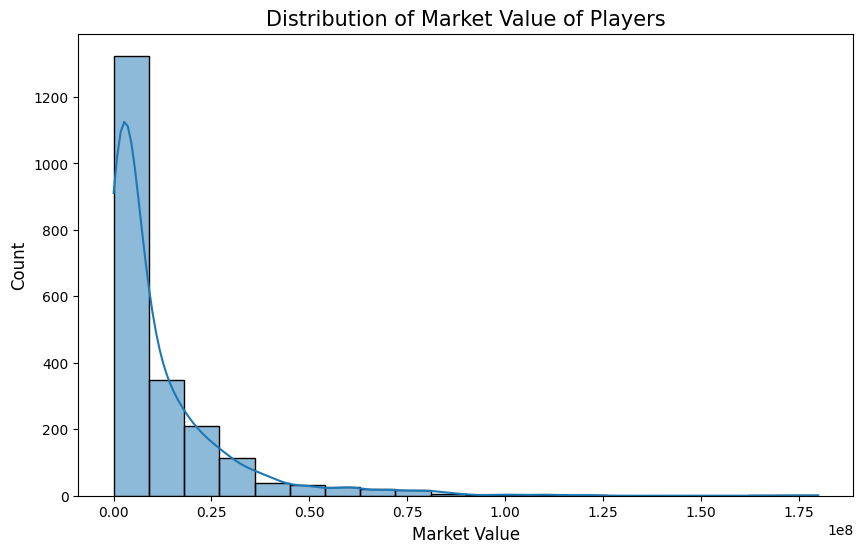

In [3]:
# Distribution of Market Value of Players

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Market value', bins=20, kde=True)
plt.title('Distribution of Market Value of Players', fontsize=15)
plt.xlabel('Market Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

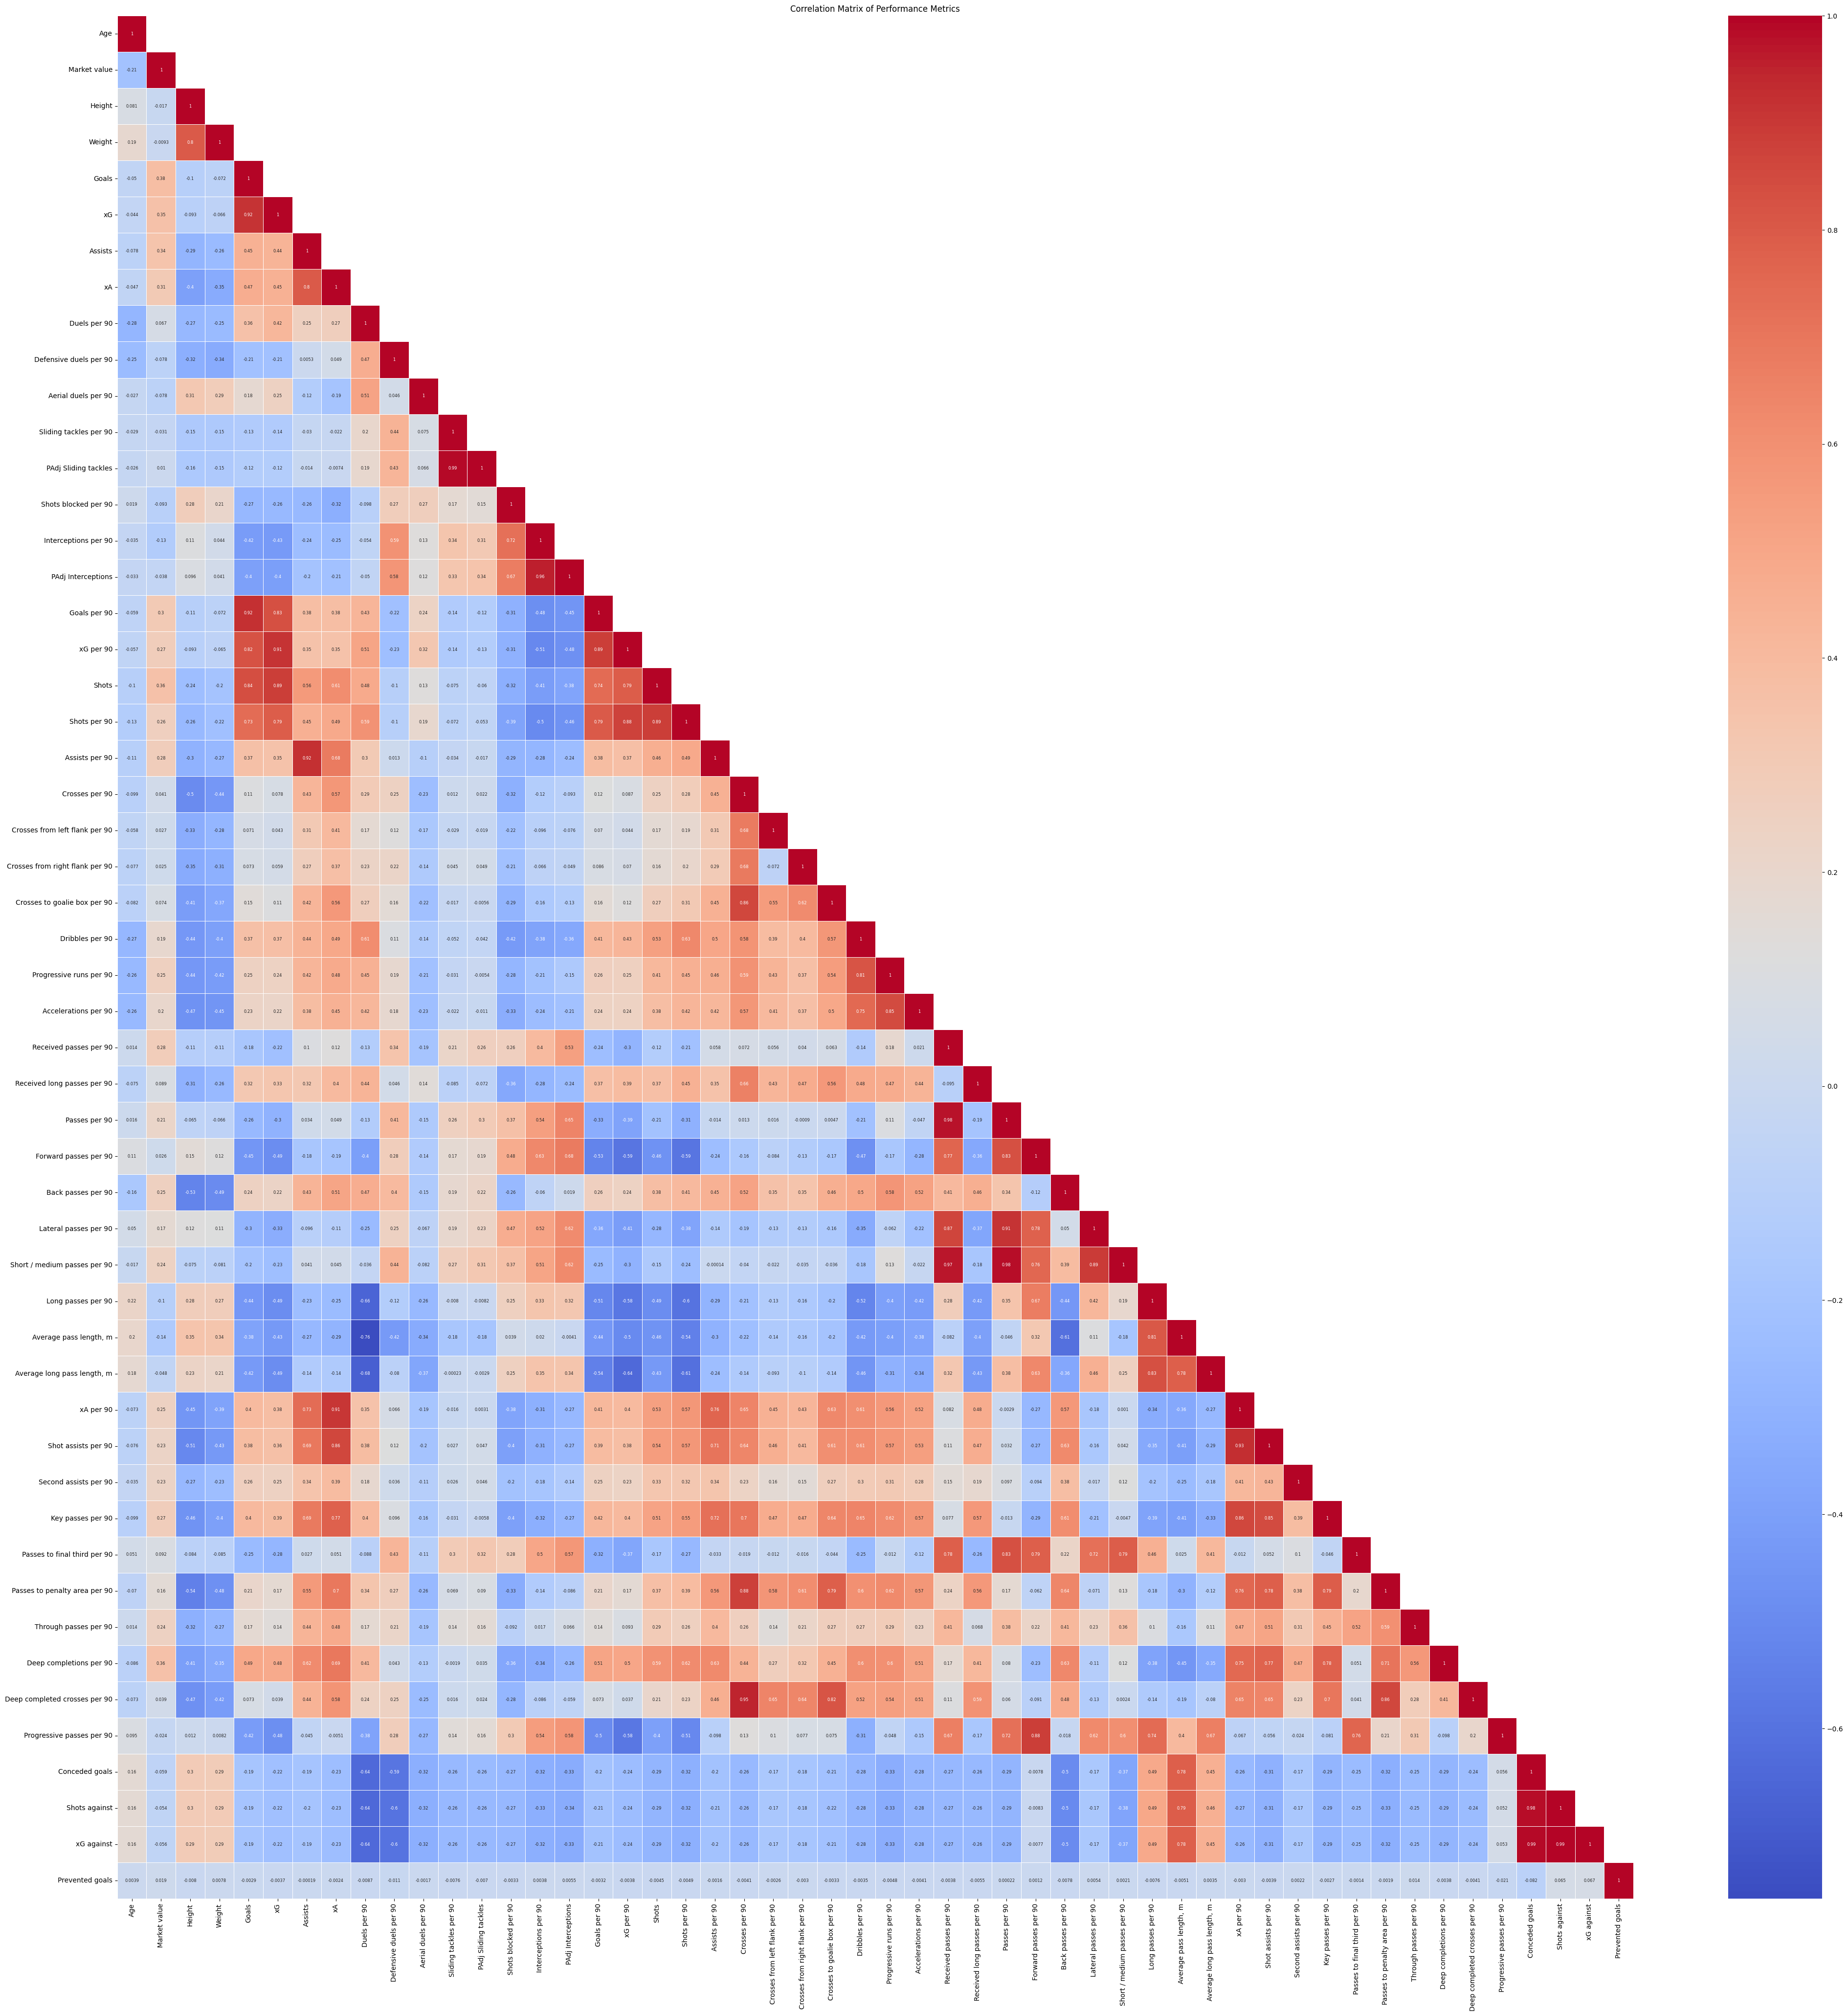

In [4]:
# Step 1: Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Step 3: Plot the correlation matrix
plt.figure(figsize=(50,50))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, annot_kws={"size": 6})
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

In [5]:
# Define columns to exclude (non-performance metrics + other non-numeric columns)
cols_to_exclude = ['Player', 'Team', 'Age', 'Market value', 'Birth country', 'Height', 'Weight'] + non_performance_metrics

# Extract only performance metrics
performance_metrics = [col for col in df.columns if col not in cols_to_exclude]
X_perf = df[performance_metrics]

# Compute VIF for performance metrics
vif_data_perf = pd.DataFrame()
vif_data_perf["feature"] = X_perf.columns
vif_data_perf["VIF"] = [variance_inflation_factor(X_perf.values, i) for i in range(X_perf.shape[1])]

# Drop features with VIF greater than 10
features_to_keep_perf = vif_data_perf[vif_data_perf["VIF"] <= 10]["feature"].values
X_filtered_perf = X_perf[features_to_keep_perf]

# Add a constant column for the intercept
X_with_const_perf = sm.add_constant(X_filtered_perf)

# Build the regression model for performance metrics
model_perf = sm.OLS(y, X_with_const_perf).fit()

# Predictions
y_pred_perf = model_perf.predict(X_with_const_perf)

# Compute RMSE and R-squared for performance metrics
rmse_perf = mean_squared_error(y, y_pred_perf, squared=False)
r_squared_perf = model_perf.rsquared

rmse_perf, r_squared_perf, model_perf.params

NameError: name 'non_performance_metrics' is not defined

In [ ]:
# Define non-performance metrics
non_performance_metrics = ['Age', 'Height', 'Weight', 'Position 1_CB', 'Position 1_CF', 'Position 1_CM',
                           'Position 1_DMF', 'Position 1_LB', 'Position 1_LW', 'Position 1_LWB', 'Position 1_RB',
                           'Position 1_RW', 'Position 1_RWB', 'Position 1_AMF', 'Position 1_GK']

X_non_perf = df[non_performance_metrics]

# Compute VIF for non-performance metrics
vif_data_non_perf = pd.DataFrame()
vif_data_non_perf["feature"] = X_non_perf.columns
vif_data_non_perf["VIF"] = [variance_inflation_factor(X_non_perf.values, i) for i in range(X_non_perf.shape[1])]

# Drop features with VIF greater than 10
features_to_keep_non_perf = vif_data_non_perf[vif_data_non_perf["VIF"] <= 10]["feature"].values
X_filtered_non_perf = X_non_perf[features_to_keep_non_perf]

# Add a constant column for the intercept
X_with_const_non_perf = sm.add_constant(X_filtered_non_perf)

# Build the regression model for non-performance metrics
model_non_perf = sm.OLS(y, X_with_const_non_perf).fit()

# Predictions
y_pred_non_perf = model_non_perf.predict(X_with_const_non_perf)

# Compute RMSE and R-squared for non-performance metrics
rmse_non_perf = mean_squared_error(y, y_pred_non_perf, squared=False)
r_squared_non_perf = model_non_perf.rsquared

rmse_non_perf, r_squared_non_perf, model_non_perf.params

In [ ]:
# Group data by position and compute mean market value
position_values = df.groupby(by=[col for col in df.columns if 'Position 1_' in col]).mean()['Market value'].sort_values()

# Plot the data
plt.figure(figsize=(15, 8))
position_values.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Impact of Position on Market Value')
plt.xlabel('Average Market Value')
plt.ylabel('Position')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
# Filter countries that have more than 20 players
country_counts = df['Birth country'].value_counts()
filtered_countries = country_counts[country_counts > 20].index

# Group data by country and compute mean market value
country_values = df[df['Birth country'].isin(filtered_countries)].groupby('Birth country').mean()['Market value'].sort_values()

# Plot the data
plt.figure(figsize=(15, 8))
country_values.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Impact of Birth Country on Market Value')
plt.xlabel('Average Market Value')
plt.ylabel('Birth Country')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()